# Conv2D (filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="valid")

- filters : filter (kernel)의 개수, kernel을 통과하여 나오는 데이터의 차원으로,
            filter 개수 만큼의 feature map(특성 사상)이 만들어 진다.
            = convolution layer (합성곱 계층)에서 나오는 출력이 32개
            = channel의 개수가 32개

- kernel_size : kernel의 크기 (일반적으로 3 * 3)

- input_shape : image의 h, w, c (입력되는 image의 shape)

- padding="valid" : 그냥 출력 (출력 이미지가 작아진다) / "same" : zero-padding 을 의미(0으로 채우기)

# MaxPooling2D (pool_size=(2, 2), strides=1)

- pool_size(2, 2) == pool_size(2)

- strides : filter (kernel) 의 이동 간격. (보폭) -> 일반적으로 pool_size와 같게 지정

- pooling 기법에는 이 외에도 MinPooling, AveragePooling 이 있다.

---

filter = kernel

sliding = filter 이동

stride : 보폭 (filter가 얼만큼 이동하는지)

feature map : filter를 거친 후 나온 특징 행렬

![](https://upload.wikimedia.org/wikipedia/commons/6/63/Typical_cnn.png)

![](https://upload.wikimedia.org/wikipedia/commons/e/e9/Max_pooling.png)

(convolution layer -> pooling layer) 반복하면서 feature extraction => fully connected layer

In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from time import time
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
(x_train, y_train), (x_test, y_test) = load_data()

In [3]:
x_train_scale, x_test_scale = x_train / 255.0, x_test / 255.0

In [4]:
print(x_train_scale.shape, y_train.shape)
print(x_test_scale.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
model = Sequential()

In [6]:
# 모델 레이어 설정을 함

# 3 * 3 kernel = 9 픽셀 정사각형
# 32: kernel (filter)의 갯수
# input_shape : 이미지의 형태
model.add(Conv2D(32, input_shape=(28, 28, 1), kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2차원으로 변형
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

c:\Users\Daniel\miniconda3\envs\multi02_tensor\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# 컴파일(레이어 이외의 설정들)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["acc"])

In [8]:
# 학습
start_time =time()

result = model.fit(x_train_scale, y_train, epochs=10, batch_size=100, validation_split=0.3)

print(f"fit time : {time() - start_time}")

Epoch 1/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 46s 91ms/step - acc: 0.7778 - loss: 0.7209 - val_acc: 0.9668 - val_loss: 0.1097
Epoch 2/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - acc: 0.9667 - loss: 0.1092 - val_acc: 0.9769 - val_loss: 0.0745
Epoch 3/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 38s 91ms/step - acc: 0.9770 - loss: 0.0731 - val_acc: 0.9816 - val_loss: 0.0610
Epoch 4/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - acc: 0.9821 - loss: 0.0562 - val_acc: 0.9790 - val_loss: 0.0681
Epoch 5/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 38s 90ms/step - acc: 0.9869 - loss: 0.0431 - val_acc: 0.9744 - val_loss: 0.0887
Epoch 6/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 39s 94ms/step - acc: 0.9885 - loss: 0.0366 - val_acc: 0.9832 - val_loss: 0.0598
Epoch 7/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - acc: 0.9908 - loss: 0.0292 - val_acc: 0.9852 - val_loss: 0.0515
Epoch 8/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 40s 95ms/step - acc: 0.9918 - loss: 0.0244 - val_acc: 0.9822 - val_loss: 0.0601
Epoch 9/10
420/420 ━━━━━━━━━━━━━━━━━━━━ 

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 384,800 (1.47 MB)

 Trainable params: 128,266 (501.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 256,534 (1002.09 KB)

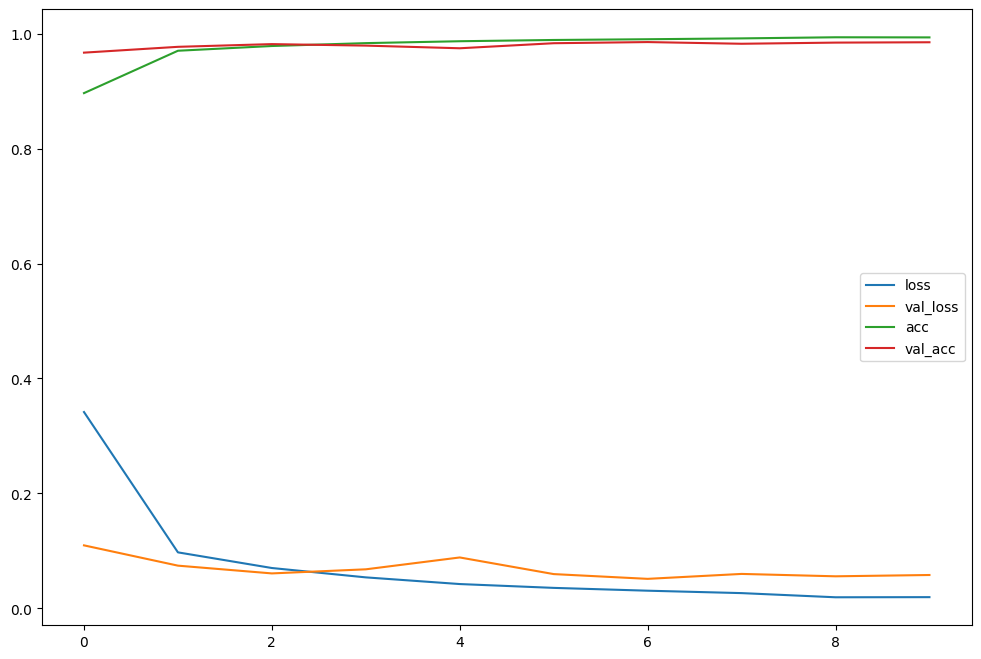

In [10]:
plot_target = ["loss", "val_loss", "acc", "val_acc"]

plt.figure(figsize=(12, 8))

for target in plot_target:
    plt.plot(result.history[target], label=target)

plt.legend()
plt.show()

In [11]:
model.evaluate(x_test_scale, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - acc: 0.9810 - loss: 0.0681


[0.05186482518911362, 0.9858999848365784]

In [12]:
predict = model.predict(x_test_scale)
predict_label = np.argmax(predict, axis=1)

print(y_test)
print(predict_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


In [13]:
wrong_predict = list()

for i in range(len(y_test)):
    if predict_label[i] != y_test[i]:
        wrong_predict.append(i)

print(len(wrong_predict))

141


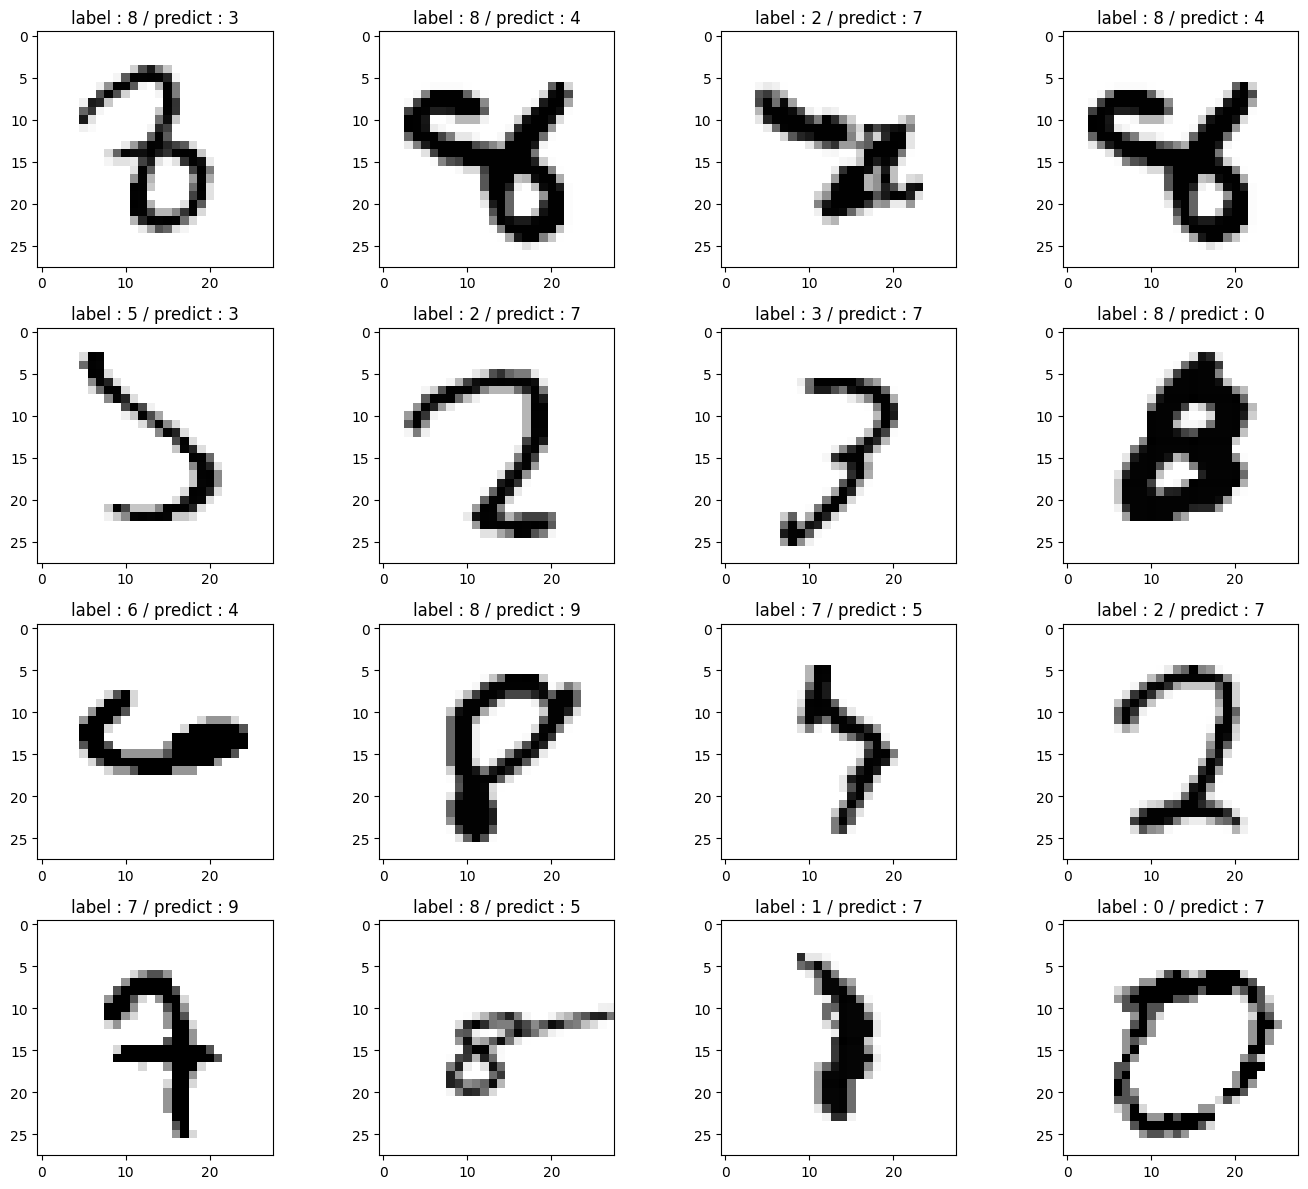

In [14]:
samples = random.choices(population=wrong_predict, k=16)

plt.figure(figsize=(14, 12))

for idx, sample in enumerate(samples):
    plt.subplot(4, 4, idx+1)
    plt.imshow(x_test[sample].reshape(28, 28), cmap="Greys")
    plt.title(f"label : {y_test[sample]} / predict : {predict_label[sample]}")

plt.tight_layout()
plt.show()